In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
cancer = pd.read_excel('cancerpatientdata.xlsx')

In [5]:
cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
cancer.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [8]:
cancer.isnull().any()

Patient Id                  False
Age                         False
Gender                      False
Air Pollution               False
Alcohol use                 False
Dust Allergy                False
OccuPational Hazards        False
Genetic Risk                False
chronic Lung Disease        False
Balanced Diet               False
Obesity                     False
Smoking                     False
Passive Smoker              False
Chest Pain                  False
Coughing of Blood           False
Fatigue                     False
Weight Loss                 False
Shortness of Breath         False
Wheezing                    False
Swallowing Difficulty       False
Clubbing of Finger Nails    False
Frequent Cold               False
Dry Cough                   False
Snoring                     False
Level                       False
dtype: bool

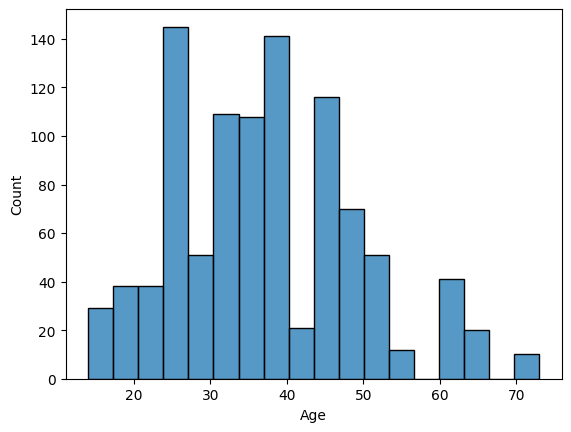

In [9]:
sns.histplot(cancer.Age)
plt.show()


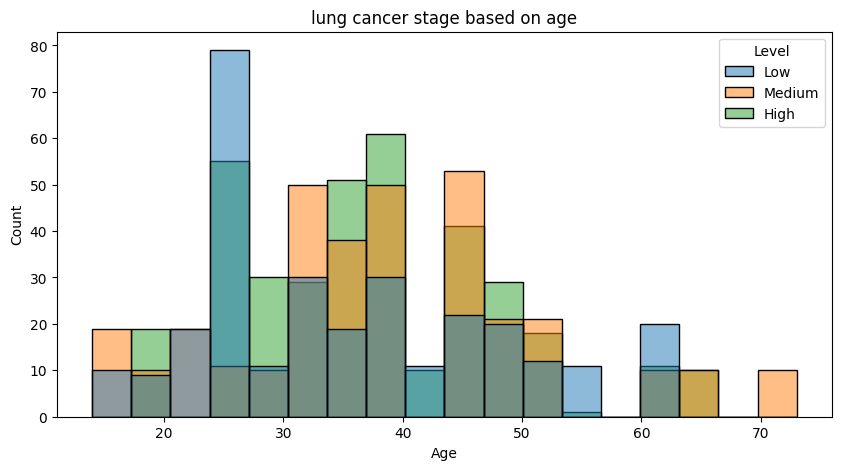

In [10]:
plt.figure(figsize=(10,5))
plt.title("lung cancer stage based on age")
sns.histplot(x="Age",hue="Level",data=cancer)
plt.show()

In [11]:
cancer['Level']=cancer['Level'].replace(['Low','Medium','High'],[0,1,2])


In [12]:
cancer['Level']

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [13]:
cancer.drop(['Patient Id'],axis=1,inplace=True)

In [14]:
cancer.to_csv('cancerpre.csv')

In [15]:
#checking class imblance

cancer['Level'].value_counts()

Level
2    365
1    332
0    303
Name: count, dtype: int64

<Axes: ylabel='count'>

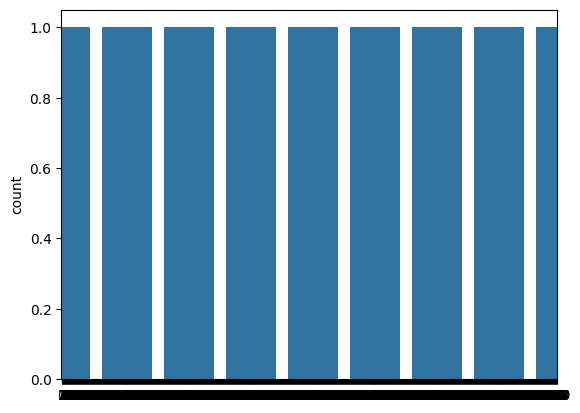

In [16]:
sns.countplot(cancer['Level'])

In [23]:
#input features
X=cancer.iloc[:,:22].values

#class label 
y=cancer.iloc[:, -1].values

In [24]:
#spilitting data into training and test data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)



In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
#KNN  Algorithm

from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [27]:
#prediciting the test set results
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 1 2 2 1 2 0 2 2 1 2 2 1 2 2 1 2 1 2 0 1 2 2 1 0 2 2 2 2 2 0 0 2 1 1 1
 0 0 1 1 1 2 1 2 0 2 1 2 0 0 1 2 2 1 2 0 1 2 2 0 1 1 2 1 2 1 0 0 0 1 1 1 1
 1 1 0 1 2 1 2 1 0 2 1 1 1 1 2 1 1 0 0 1 0 0 1 0 2 2 2 2 0 0 1 2 1 1 0 0 0
 1 2 2 0 2 1 1 0 0 0 2 0 0 0 0 1 0 2 2 2 0 0 2 1 1 2 2 2 1 0 1 0 2 2 2 0 2
 0 2 2 0 0 1 0 1 2 2 2 2 1 0 2 1 2 2 0 2 1 1 1 1 1 0 0 0 0 2 1 2 2 1 2 0 2
 0 2 2 2 1 2 0 2 1 1 0 0 0 2 2 0 2 0 2 2 0 2 2 0 1 2 2 0 2 1 1 0 0 2 2 1 0
 0 1 1 0 2 1 2 1 2 0 0 1 0 0 2 0 1 0 0 1 1 1 0 2 0 1 2 0 2 1 2 1 1 0 2 0 1
 1 0 1 1 1 1 1 1 1 0 2 0 0 2 1 1 2 2 1 2 2 0 2 0 2 0 1 2 0 1 2 1 1 0 0 2 2
 2 2 1 1]


In [28]:
print(y_test)

[0 0 1 2 2 1 2 0 2 2 1 2 2 1 2 2 1 2 1 2 0 1 2 2 1 0 2 2 2 2 2 0 0 2 1 1 1
 0 0 1 1 1 2 1 2 0 2 1 2 0 0 1 2 2 1 2 0 1 2 2 0 1 1 2 1 2 1 0 0 0 1 1 1 1
 1 1 0 1 2 1 2 1 0 2 1 1 1 1 2 1 1 0 0 1 0 0 1 0 2 2 2 2 0 0 1 2 1 1 0 0 0
 1 2 2 0 2 1 1 0 0 0 2 0 0 0 0 1 0 2 2 2 0 0 2 1 1 2 2 2 1 0 1 0 2 2 2 0 2
 0 2 2 0 0 1 0 1 2 2 2 2 1 0 2 1 2 2 0 2 1 1 1 1 1 0 0 0 0 2 1 2 2 1 2 0 2
 0 2 2 2 1 2 0 2 1 1 0 0 0 2 2 0 2 0 2 2 0 2 2 0 1 2 2 0 2 1 1 0 0 2 2 1 0
 0 1 1 0 2 1 2 1 2 0 0 1 0 0 2 0 1 0 0 1 1 1 0 2 0 1 2 0 2 1 2 1 1 0 2 0 1
 1 0 1 1 1 1 1 1 1 0 2 0 0 2 1 1 2 2 1 2 2 0 2 0 2 0 1 2 0 1 2 1 1 0 0 2 2
 2 2 1 1]


Accuracy of KNN: 1.00


Confusion Matrix :
[[ 91   0   0]
 [  0 100   0]
 [  0   0 109]] 


-----------------------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



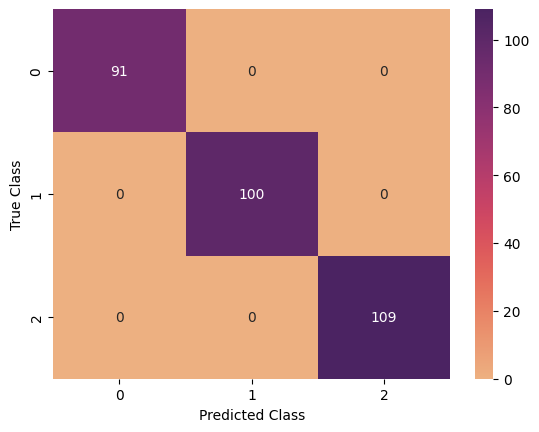

<Axes: >

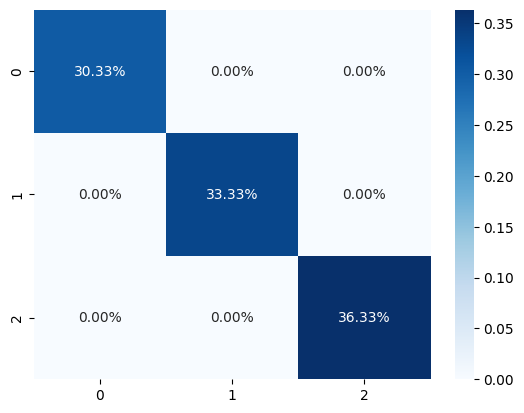

In [29]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of KNN: %.2f\n\n'%(accuracy))
conf_matr=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix :')
print(conf_matr,'\n\n')
print('-----------------------------')
result_1=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result_1)

cm=metrics.confusion_matrix(y_test,y_pred)


ax =sns.heatmap(cm,cmap='flare',annot=True,fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [30]:
#Neural Network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_shape=(22,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

history = model.fit(X_train, y_train, epochs=30, batch_size=10,verbose=2,validation_split=0.2)

y_pred = model.predict(X_test)





Epoch 1/30


56/56 - 2s - loss: 1.1971 - accuracy: 0.3875 - val_loss: 1.0705 - val_accuracy: 0.4429 - 2s/epoch - 28ms/step
Epoch 2/30
56/56 - 0s - loss: 0.9554 - accuracy: 0.4982 - val_loss: 0.8504 - val_accuracy: 0.5214 - 124ms/epoch - 2ms/step
Epoch 3/30
56/56 - 0s - loss: 0.7702 - accuracy: 0.6929 - val_loss: 0.6605 - val_accuracy: 0.7643 - 176ms/epoch - 3ms/step
Epoch 4/30
56/56 - 0s - loss: 0.6115 - accuracy: 0.7857 - val_loss: 0.5112 - val_accuracy: 0.8357 - 140ms/epoch - 3ms/step
Epoch 5/30
56/56 - 0s - loss: 0.4838 - accuracy: 0.8714 - val_loss: 0.3976 - val_accuracy: 0.8857 - 129ms/epoch - 2ms/step
Epoch 6/30
56/56 - 0s - loss: 0.3851 - accuracy: 0.9071 - val_loss: 0.2990 - val_accuracy: 0.9500 - 122ms/epoch - 2ms/step
Epoch 7/30
56/56 - 0s - loss: 0.2983 - accuracy: 0.9339 - val_loss: 0.2188 - val_accuracy: 0.9571 - 156ms/epoch - 3ms/step
Epoch 8/30
56/56 - 0s - loss: 0.2313 - accuracy: 0.9536 - val_loss: 0.1656 - val_accuracy: 0.9714 - 123ms/epoch - 2ms/step
Epoch 9/30
56

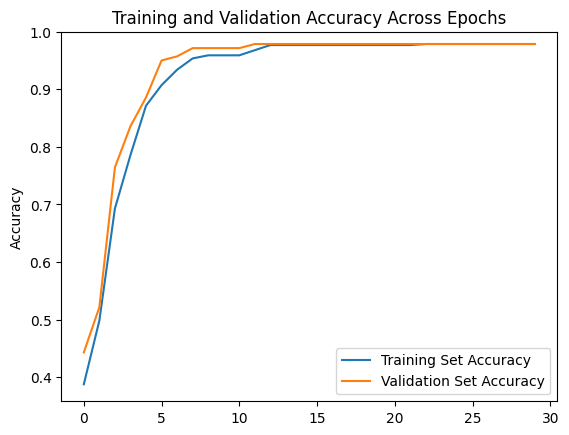

In [31]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

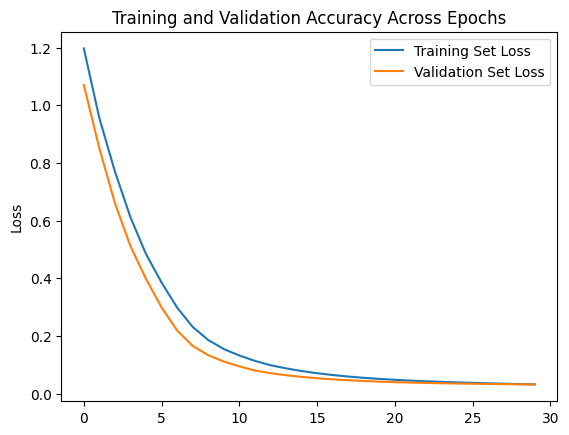

In [32]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

10/10 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Confusion Matrix')

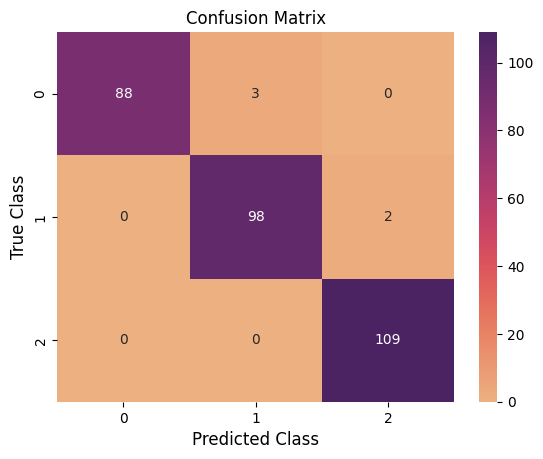

In [34]:
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        91
           1       0.97      0.98      0.98       100
           2       0.98      1.00      0.99       109

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

